<span style="color:red">***This notebook should be run inside jupyter lab***</span>

# Introduction:
A typical 4G network consists of several nodes connected to each other, where each node serves
users in the surrounding area. While users are accessing network services, their mobile phones
record Key Performance Indicators (KPI’s) which can help network operators in assessing their
quality of service.

There are many KPI’s which evaluate different aspects of the network. For example, RSRP
(Reference Signals Received Power) is a KPI which measures the network coverage in the user’s
location. Traffic Volume is another KPI which measures how much data has been consumed by the
user.

# Importing tools:

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
# The wordclouds lib
from wordcloud import WordCloud

# the interactive plotting libs
import holoviews as hv
from holoviews.operation.datashader import  inspect, rasterize
# colour maps lib
import colorcet as cc
# to convet the lat and lon to mercato web format
from datashader.utils import lnglat_to_meters
# panel lib for widgets and dashboards
import panel as pn
pn.extension()
hv.extension('bokeh')

# Reading Data:

In [2]:
RSRP_data = pd.read_csv("RSRP.csv")

# EDA & Data Cleaning:

In [3]:
RSRP_data.head(10)

Timestamp  LocationLatitude  LocationLongitude  \
0  2019-11-02 00:09:29.386 +0300          24.54054          46.784737   
1  2019-11-02 00:09:29.386 +0300          24.54054          46.784737   
2  2019-11-02 00:10:45.323 +0300          24.54054          46.784737   
3  2019-11-02 00:10:45.323 +0300          24.54054          46.784737   
4  2019-11-02 00:11:26.822 +0300          24.54054          46.784737   
5  2019-11-02 00:11:26.822 +0300          24.54054          46.784737   
6  2019-11-02 00:17:44.340 +0300          24.54054          46.784737   
7  2019-11-02 00:17:44.340 +0300          24.54054          46.784737   
8  2019-11-02 00:23:41.693 +0300          24.54054          46.784737   
9  2019-11-02 00:23:41.693 +0300          24.54054          46.784737   

  RadioConnectionType       Country RadioNetworkGeneration RadioOperatorName  \
0              Mobile  Saudi Arabia                     4G        Operator C   
1              Mobile  Saudi Arabia                     4G        Operator C   
2              Mobile  Saudi Arabia                     3G        Operator C   
3              Mobile  Saudi Arabia                     3G        Operator C   
4              Mobile  Saudi Arabia                     4G        Operator C   
5              Mobile  Saudi Arabia                     4G        Operator C   
6              Mobile  Saudi Arabia                     3G        Operator C   
7              Mobile  Saudi Arabia                     3G        Operator C   
8              Mobile  Saudi Arabia                     2G        Operator C   
9              Mobile  Saudi Arabia                     2G        Operator C   

         RSRP RadioMobileDataEnabled DeviceManufacturer           DeviceName  
0  2147483647                Enabled                HTC                D728W  
1  2147483647                Enabled                HTC  Desire 728 Dual Sim  
2  2147483647                Enabled                HTC                D728W  
3  2147483647                Enabled                HTC  Desire 728 Dual Sim  
4  2147483647                Enabled                HTC                D728W  
5  2147483647                Enabled                HTC  Desire 728 Dual Sim  
6  2147483647                Enabled                HTC                D728W  
7  2147483647                Enabled                HTC  Desire 728 Dual Sim  
8  2147483647                Enabled                HTC                D728W  
9  2147483647                Enabled                HTC  Desire 728 Dual Sim

In [4]:
RSRP_data.sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
1701309  2019-11-03 13:45:25.018 +0300         24.776640          46.832640   
2195551  2019-11-02 15:51:45.000 +0300         24.634645          46.727207   
2444788  2019-11-04 21:12:58.015 +0300         24.752766          46.848900   
1640307  2019-11-04 08:07:31.016 +0300         24.524467          46.870540   
536333   2019-11-02 15:31:22.000 +0300         24.624674          46.806545   
452509   2019-11-03 10:29:39.999 +0300         24.668163          46.623466   
243927   2019-11-02 18:13:31.030 +0300         24.593946          46.711895   
679221   2019-11-02 15:44:32.000 +0300         24.778399          46.787086   
1328225  2019-11-03 22:24:47.999 +0300         24.566790          46.754982   
1139621  2019-11-03 00:28:27.027 +0300         24.943876          46.986810   
641990   2019-11-02 08:31:58.035 +0300         24.812916          46.760048   
997881   2019-11-02 09:29:42.013 +0300         24.751034          46.670727   
847837   2019-11-03 06:45:04.021 +0300         24.594349          46.666058   
1519619  2019-11-03 19:16:49.000 +0300         24.566427          46.786385   
1025851  2019-11-02 13:32:20.034 +0300         24.579075          46.704260   
2006589  2019-11-03 07:20:00.002 +0300         24.711853          46.651280   
4002     2019-11-02 10:52:13.986 +0300         24.575705          46.784496   
1072957  2019-11-02 19:04:19.000 +0300         24.828707          46.739340   
736296   2019-11-02 19:03:00.013 +0300         24.634972          46.689014   
503593   2019-11-03 04:45:27.025 +0300         24.592434          46.715637   

        RadioConnectionType       Country RadioNetworkGeneration  \
1701309              Mobile  Saudi Arabia                     3G   
2195551              Mobile  Saudi Arabia                     4G   
2444788              Mobile  Saudi Arabia                     4G   
1640307              Mobile  Saudi Arabia                     3G   
536333               Mobile  Saudi Arabia                     4G   
452509               Mobile  Saudi Arabia                     3G   
243927               Mobile  Saudi Arabia                     3G   
679221               Mobile  Saudi Arabia                     4G   
1328225              Mobile  Saudi Arabia                     4G   
1139621              Mobile  Saudi Arabia                     3G   
641990               Mobile  Saudi Arabia                     3G   
997881               Mobile  Saudi Arabia                     4G   
847837               Mobile  Saudi Arabia                     4G   
1519619              Mobile  Saudi Arabia                     3G   
1025851              Mobile  Saudi Arabia                     4G   
2006589              Mobile  Saudi Arabia                     4G   
4002                 Mobile  Saudi Arabia                     4G   
1072957              Mobile  Saudi Arabia                     4G   
736296               Mobile  Saudi Arabia                     4G   
503593               Mobile  Saudi Arabia                     4G   

        RadioOperatorName        RSRP RadioMobileDataEnabled  \
1701309        Operator C  2147483647                Enabled   
2195551        Operator A         -69                Enabled   
2444788        Operator C         -72                Enabled   
1640307        Operator A  2147483647                Enabled   
536333         Operator C         -82                Enabled   
452509         Operator A  2147483647                Enabled   
243927         Operator A  2147483647                Enabled   
679221         Operator B         -94                Enabled   
1328225        Operator A         -63                Enabled   
1139621        Operator B  2147483647                Enabled   
641990         Operator B  2147483647                Enabled   
997881         Operator B         -80                Enabled   
847837         Operator A         -74                Enabled   
1519619        Operator A  2147483647       

In [5]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Timestamp               object 
 1   LocationLatitude        float64
 2   LocationLongitude       float64
 3   RadioConnectionType     object 
 4   Country                 object 
 5   RadioNetworkGeneration  object 
 6   RadioOperatorName       object 
 7   RSRP                    int64  
 8   RadioMobileDataEnabled  object 
 9   DeviceManufacturer      object 
 10  DeviceName              object 
dtypes: float64(2), int64(1), object(8)
memory usage: 228.7+ MB


There is categorical data but it's treated as it is a string, I'll convert it into the category data type

In [6]:
cols = [
       "RadioConnectionType",
       "RadioNetworkGeneration",
       "RadioOperatorName",
       "RadioMobileDataEnabled",
       "DeviceManufacturer",
       "DeviceName"
      ]
RSRP_data[cols] = RSRP_data[cols].astype('category')

In [7]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 11 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Timestamp               object  
 1   LocationLatitude        float64 
 2   LocationLongitude       float64 
 3   RadioConnectionType     category
 4   Country                 object  
 5   RadioNetworkGeneration  category
 6   RadioOperatorName       category
 7   RSRP                    int64   
 8   RadioMobileDataEnabled  category
 9   DeviceManufacturer      category
 10  DeviceName              category
dtypes: category(6), float64(2), int64(1), object(2)
memory usage: 122.2+ MB


In [8]:
# let's look at the 'Country' column, seems all the values are Saudi Arabia
RSRP_data["Country"].value_counts()

Saudi Arabia    2725197
Name: Country, dtype: int64

**Since There's only one value in this column, it should be removed since it does not contain much information.**

In [9]:
#There only one value in the Country column, it's better to remove that column to simplify our data
RSRP_data.drop("Country", axis=1, inplace=True)

In [10]:
# let's look at the 'RadioConnectionType' column, seems all the values are Mobile
RSRP_data["RadioConnectionType"].value_counts()

Mobile     2717295
WiFi          7390
Unknown        668
Name: RadioConnectionType, dtype: int64

**Note:**
We have way more mobile instances than the other but still we can't delete the column like we did before.

In [11]:
RSRP_data["RadioMobileDataEnabled"].value_counts()

Enabled     2724635
Disabled        718
Name: RadioMobileDataEnabled, dtype: int64

**Again**, there is a class that is dominating and a few instances of the other.
We can't drop this column too, but data must be prepared if a classification will be used becuase of how skwed our dataset is towards a specific class. 

In [12]:
# let's take a look at the RadioNetworkGeneration
RSRP_data["RadioNetworkGeneration"].value_counts()

4G         2257240
3G          445246
Unknown      17361
2G            5464
WiFi            42
Name: RadioNetworkGeneration, dtype: int64

**4G domination!**

In [13]:
# let's take a look at the manufacturer
RSRP_data["DeviceManufacturer"].value_counts()

samsung       2404478
HUAWEI         111972
HTC             36046
LGE             30428
Xiaomi          25612
HMD Global      23497
motorola        19909
LENOVO          18679
TCL              9607
OnePlus          9559
OPPO             9108
vivo             6502
Lenovo           5862
Sony             4040
lenovo           3517
Realme           1760
realme           1598
PANASONIC        1224
QMobile           723
htc               578
LeEco             293
E1                135
ZTE               133
Hisense            40
OBI                18
SHARP              12
Mione               9
Infinix             8
LAVA                6
Name: DeviceManufacturer, dtype: int64

**There are things to notice here:**
- Samsung domination!
- Some manufacturer have different names for example: there's ( **Realme**, **realme** | **Lenovo**, **lenovo**, **LENOVO** | **HTC**, **htc** ). If we wish we can even join Realme, vivo, Oppo into one category since these belong to a single company.
- Another thing to notice here is the LGE manufacturer, this refers to the LG company. 


*Let's rename this to the most common name and name the duplicates with one exact name.*

In [14]:
RSRP_data["DeviceManufacturer"].replace("Realme", "realme", inplace=True)
RSRP_data["DeviceManufacturer"].replace("lenovo", "Lenovo", inplace=True)
RSRP_data["DeviceManufacturer"].replace("LENOVO", "Lenovo", inplace=True)
RSRP_data["DeviceManufacturer"].replace("htc", "HTC", inplace=True)
RSRP_data["DeviceManufacturer"].replace("LGE", "LG", inplace=True)
RSRP_data["DeviceManufacturer"].replace("samsung", "SAMSUNG", inplace=True)

In [15]:
RSRP_data["DeviceManufacturer"].value_counts()

SAMSUNG       2404478
HUAWEI         111972
HTC             36624
LG              30428
Lenovo          28058
Xiaomi          25612
HMD Global      23497
motorola        19909
TCL              9607
OnePlus          9559
OPPO             9108
vivo             6502
Sony             4040
realme           3358
PANASONIC        1224
QMobile           723
LeEco             293
E1                135
ZTE               133
Hisense            40
OBI                18
SHARP              12
Mione               9
Infinix             8
LAVA                6
Name: DeviceManufacturer, dtype: int64

**Now Lenovo is looking big!**

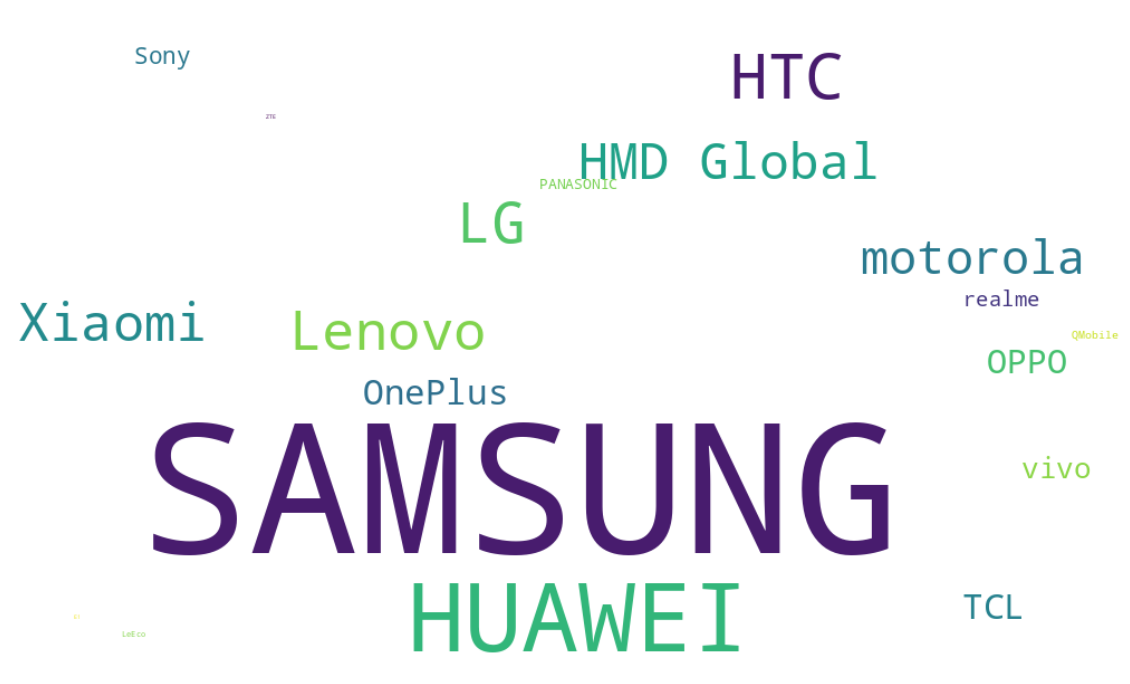

In [16]:
# Another way of plotting these values is by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data["DeviceManufacturer"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

This visual shows how each class weight in a simple visualization.

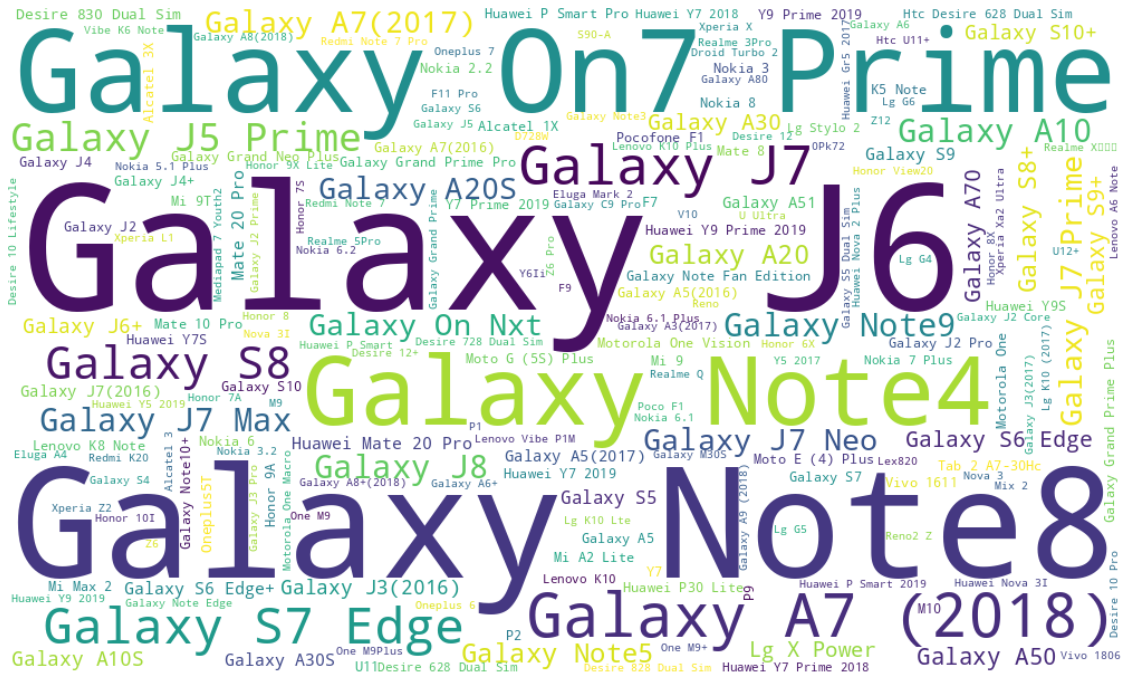

In [17]:
# Another way of plotting these values by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data["DeviceName"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

**Now**, the *'Timestamp'* column must be converted to the datetime datatype in pandas. The *'to_datetime'* method is used with the format parameter provided, this helps in making the conversion process quick and more accurate. The formate of the datatime can be deduced from the dataset. Pandas provides a nice way to represent the time in way similar to regex.

In [18]:
# Now let's convert the TimeStamp column to datetime type in pandas, the 'utc' parameter is essential here for this to work!
RSRP_data["Timestamp"] = pd.to_datetime(RSRP_data["Timestamp"], format="%Y-%m-%d %H:%M:%S.%f%z", utc=True)

In [19]:
RSRP_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725353 entries, 0 to 2725352
Data columns (total 10 columns):
 #   Column                  Dtype              
---  ------                  -----              
 0   Timestamp               datetime64[ns, UTC]
 1   LocationLatitude        float64            
 2   LocationLongitude       float64            
 3   RadioConnectionType     category           
 4   RadioNetworkGeneration  category           
 5   RadioOperatorName       category           
 6   RSRP                    int64              
 7   RadioMobileDataEnabled  category           
 8   DeviceManufacturer      category           
 9   DeviceName              category           
dtypes: category(6), datetime64[ns, UTC](1), float64(2), int64(1)
memory usage: 101.4 MB


Looking at the Timestamp column, the dtype of Timestamp is now a datetime type

Now let's check our numerical fields to check that they are in the valid range

The valid range for latitude is between +90 and -90, any values outside this range are invalid

In [20]:
RSRP_data[(RSRP_data['LocationLatitude'] > 90) | (RSRP_data['LocationLatitude'] < -90)].value_counts().sum()

0

**All latitude values are valid!**

The valid range for longitude is between +180 and -180, any values outside this range are invalid

In [21]:
RSRP_data[(RSRP_data['LocationLongitude'] > 180) | (RSRP_data['LocationLongitude'] < -180)].value_counts().sum()

0

**All longtitude values are valid!**

There something weird with the RSRP column here, there's a very big positive value and the rest are small negative ones.

The valid range for RSRP is [-44,-140]
Let's look up the invalid values.

In [56]:
RSRP_data_invalid = RSRP_data[(RSRP_data['RSRP'] > -44) | (RSRP_data['RSRP'] < -140)]
print(RSRP_data_invalid.shape)
RSRP_data_invalid.sample(20)

(644006, 10)


Timestamp  LocationLatitude  LocationLongitude  \
1925598 2019-11-03 21:17:37.982000+00:00         24.599936          46.754543   
120450  2019-11-02 04:45:21.020000+00:00         24.678442          46.749340   
1841670 2019-11-03 18:38:50.016000+00:00         24.791412          46.744770   
446663  2019-11-02 12:18:04.067000+00:00         24.726955          46.755352   
2450366 2019-11-04 15:01:38.037000+00:00         24.807432          46.769993   
719094  2019-11-02 16:39:06.015000+00:00         24.618830          46.686558   
2116943 2019-11-04 06:29:09.067000+00:00         24.769999          46.733920   
1295030 2019-11-03 10:04:12.021000+00:00         24.755558          46.703640   
272606         2019-11-02 07:57:47+00:00         24.626318          46.715942   
865768  2019-11-02 19:48:34.013000+00:00         24.610773          46.728672   
2176910 2019-11-04 08:05:17.025000+00:00         24.751630          46.851326   
329330  2019-11-02 09:19:57.004000+00:00         24.810630          46.743620   
916752  2019-11-02 21:09:30.021000+00:00         24.937777          46.969685   
22805   2019-11-01 22:18:13.650000+00:00         24.521650          46.663654   
1210127        2019-11-03 08:23:59+00:00         24.905163          46.711613   
558920  2019-11-02 14:10:48.771000+00:00         24.591133          46.787720   
2177904 2019-11-04 08:07:01.027000+00:00         24.822691          46.760120   
8186    2019-11-01 21:28:20.881000+00:00         24.540540          46.784737   
514300  2019-11-02 13:33:44.042000+00:00         24.650084          46.702625   
1380908        2019-11-03 11:31:30+00:00         24.778164          46.803135   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  \
1925598              Mobile                     4G        Operator B   
120450               Mobile                     4G        Operator B   
1841670              Mobile                     4G        Operator B   
446663               Mobile                     3G        Operator A   
2450366              Mobile                     3G        Operator B   
719094               Mobile                     3G        Operator A   
2116943              Mobile                     4G        Operator B   
1295030              Mobile                     3G        Operator B   
272606               Mobile                Unknown        Operator C   
865768               Mobile                     3G        Operator C   
2176910              Mobile                     3G        Operator C   
329330               Mobile                     3G        Operator A   
916752               Mobile                     4G        Operator B   
22805                Mobile                     4G        Operator A   
1210127              Mobile                     3G        Operator A   
558920               Mobile                     3G        Operator B   
2177904              Mobile                     3G        Operator B   
8186                 Mobile                     2G        Operator C   
514300               Mobile                     3G        Operator A   
1380908              Mobile                     3G        Operator B   

               RSRP RadioMobileDataEnabled DeviceManufacturer  \
1925598  2147483647                Enabled            SAMSUNG   
120450   2147483647                Enabled            SAMSUNG   
1841670  2147483647                Enabled            SAMSUNG   
446663   2147483647                Enabled            SAMSUNG   
2450366  2147483647                Enabled            SAMSUNG   
719094   2147483647                Enabled            SAMSUNG   
2116943  2147483647                Enabled            SAMSUNG   
1295030  2147483647                Enabled            SAMSUNG   
272606   2147483647                Enabled            SAMSUNG   
865768   2147483647                Enabled            SAMSUNG   
2176910  2147483647                Enabled            SAMSUNG   
329330   2147483647                E

In [57]:
RSRP_data_valid = RSRP_data[(RSRP_data['RSRP'] < -44) & (RSRP_data['RSRP'] > -140)]
print(RSRP_data.shape)
RSRP_data_valid.sample(20)

(2723541, 10)


Timestamp  LocationLatitude  LocationLongitude  \
1693756        2019-11-03 15:49:58+00:00         24.759241          46.713585   
1270739        2019-11-03 09:38:07+00:00         24.779260          46.706978   
1689630 2019-11-03 15:46:39.029000+00:00         24.554853          46.701230   
2616903 2019-11-04 18:31:43.014000+00:00         24.734629          46.663470   
1307442 2019-11-03 10:19:19.021000+00:00         24.657616          46.683910   
2128280 2019-11-04 06:47:53.045000+00:00         24.631080          46.803680   
293498         2019-11-02 08:24:52+00:00         24.703913          46.701650   
745338  2019-11-02 17:16:13.023000+00:00         24.593624          46.713737   
2057816 2019-11-04 04:59:34.059000+00:00         24.596603          46.680622   
1006986 2019-11-03 03:51:23.044000+00:00         24.727053          46.624146   
1638788 2019-11-03 15:08:52.999000+00:00         24.738968          46.594710   
1508035 2019-11-03 13:21:47.001000+00:00         24.578478          46.778280   
1794184        2019-11-03 17:28:26+00:00         24.810549          46.716244   
2684665 2019-11-04 19:48:15.025000+00:00         24.592474          46.715610   
1691153        2019-11-03 15:47:57+00:00         24.730413          46.823788   
2239414 2019-11-04 09:48:55.342000+00:00         24.679203          46.690380   
1480121 2019-11-03 12:59:17.001000+00:00         24.698992          46.650986   
1971566 2019-11-04 00:35:44.001000+00:00         24.832449          46.759770   
2367613 2019-11-04 13:19:50.742000+00:00         24.767485          46.669860   
2145351        2019-11-04 07:10:42+00:00         24.663551          46.741882   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  RSRP  \
1693756              Mobile                     4G        Operator C   -83   
1270739              Mobile                     4G        Operator A   -81   
1689630              Mobile                     4G        Operator B   -78   
2616903              Mobile                     4G        Operator A  -103   
1307442              Mobile                     4G        Operator A   -77   
2128280              Mobile                     4G        Operator B   -84   
293498               Mobile                     4G        Operator C   -66   
745338               Mobile                     4G        Operator A   -75   
2057816              Mobile                     4G        Operator A  -107   
1006986              Mobile                     4G        Operator A   -91   
1638788              Mobile                     4G        Operator A   -75   
1508035              Mobile                     4G        Operator A   -60   
1794184              Mobile                     4G        Operator C   -86   
2684665              Mobile                     4G        Operator A   -79   
1691153              Mobile                     4G        Operator C   -65   
2239414              Mobile                     4G        Operator A   -91   
1480121              Mobile                     4G        Operator A   -76   
1971566              Mobile                     4G        Operator C   -78   
2367613              Mobile                     4G        Operator A   -92   
2145351              Mobile                     4G        Operator C   -79   

        RadioMobileDataEnabled DeviceManufacturer        DeviceName  
1693756                Enabled            SAMSUNG       Galaxy A20S  
1270739                Enabled            SAMSUNG   Galaxy J5 Prime  
1689630                Enabled            SAMSUNG         Galaxy S8  
2616903                Enabled            SAMSUNG      Galaxy Note9  
1307442                Enabled             Xiaomi       Pocofone F1  
2128280                Enabled            SAMSUNG   Galaxy A3(2017)  
293498                 Enabled            SAMSUNG         Galaxy J6  
745338                 Enabled            SAMSUNG  Galaxy On7 Prime  
2057816                Enabled            SAMSUNG      Galax

***A huge number of invalid data points for RSRP values, however it's better not to drop these datapoints now, these rows still contain useful information that we can use.***

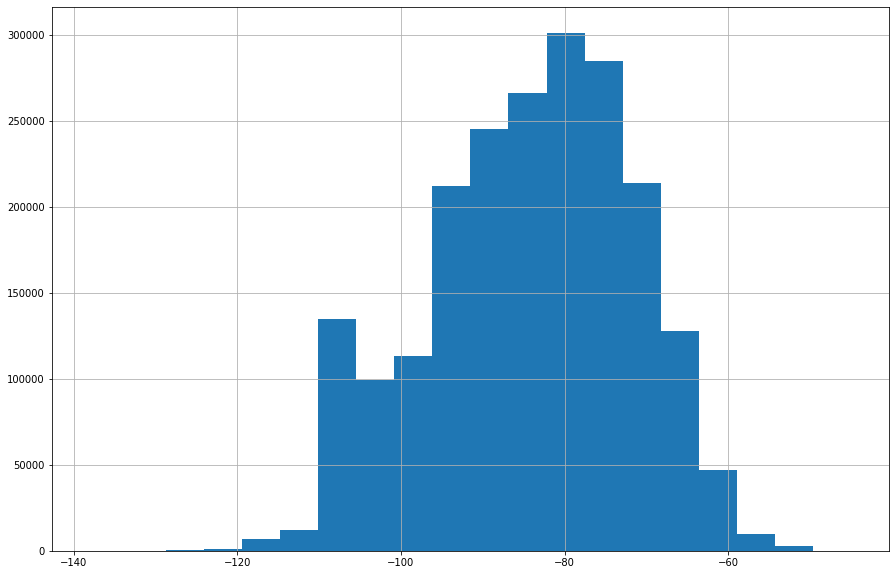

In [62]:
RSRP_data_valid["RSRP"].hist(figsize=(15,10), bins=20)
plt.show()

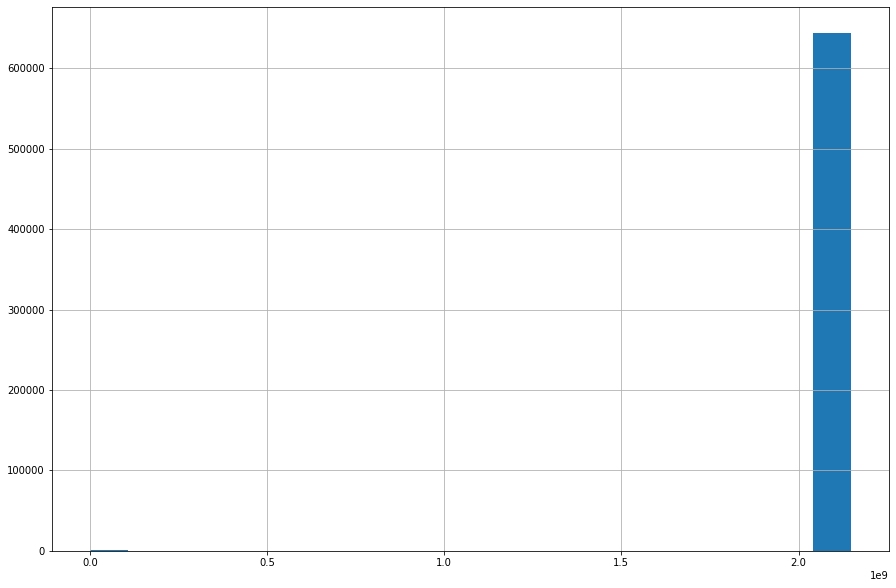

In [51]:
RSRP_data_invalid["RSRP"].hist(figsize=(15,10), bins=20)
plt.show()

Lookin at the histogram of these valid RSRP values, we see they are taking a bell curved shape. However, the invalid RSRP values are all almost the same invalid value, except for a few small values that are close to zero.
Looking for domain experience and by looking some the android documentation, I found out that this value (2147483647) is sent by the mobile phone when it can't read the RSRP value.

This data contains longtitude and latitude, we were informed that this data is from Saudi Arabia, but we don't know which part of Saudi Arabia. These points can be plotted and using a refrence point (drawn using a red traingle) and google maps or openstreetmaps, we can find the area from which this data came.

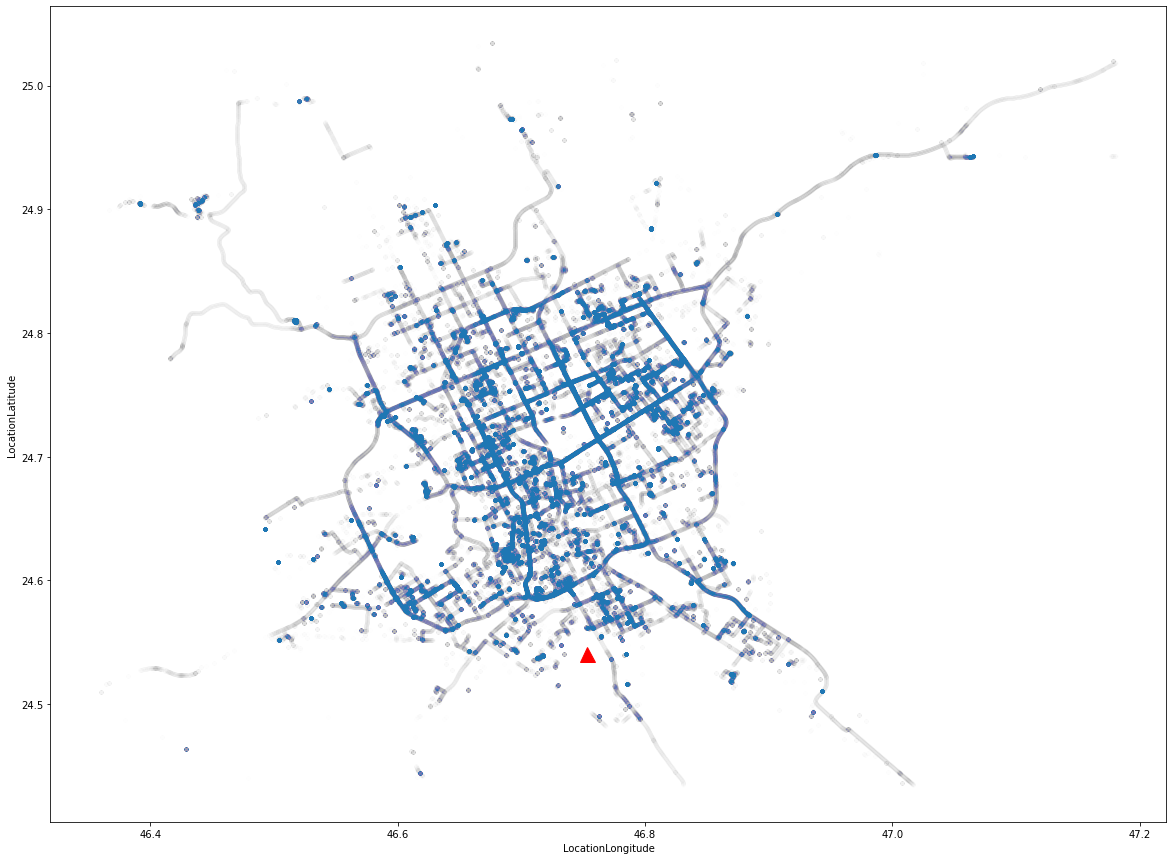

In [23]:
RSRP_data_invalid.plot(kind="scatter", 
                        x="LocationLongitude", 
                        y="LocationLatitude",
                        alpha=0.005,
                        figsize=(20,15))

plt.plot(46.752800, 24.540540, '^r', markersize=15)
plt.show()

***By looking at the google maps and using the red point as a refrence point we can see that this is map of Riyad city.***
<img src="riyad.png"/>

*Now let's look at our valid data:*

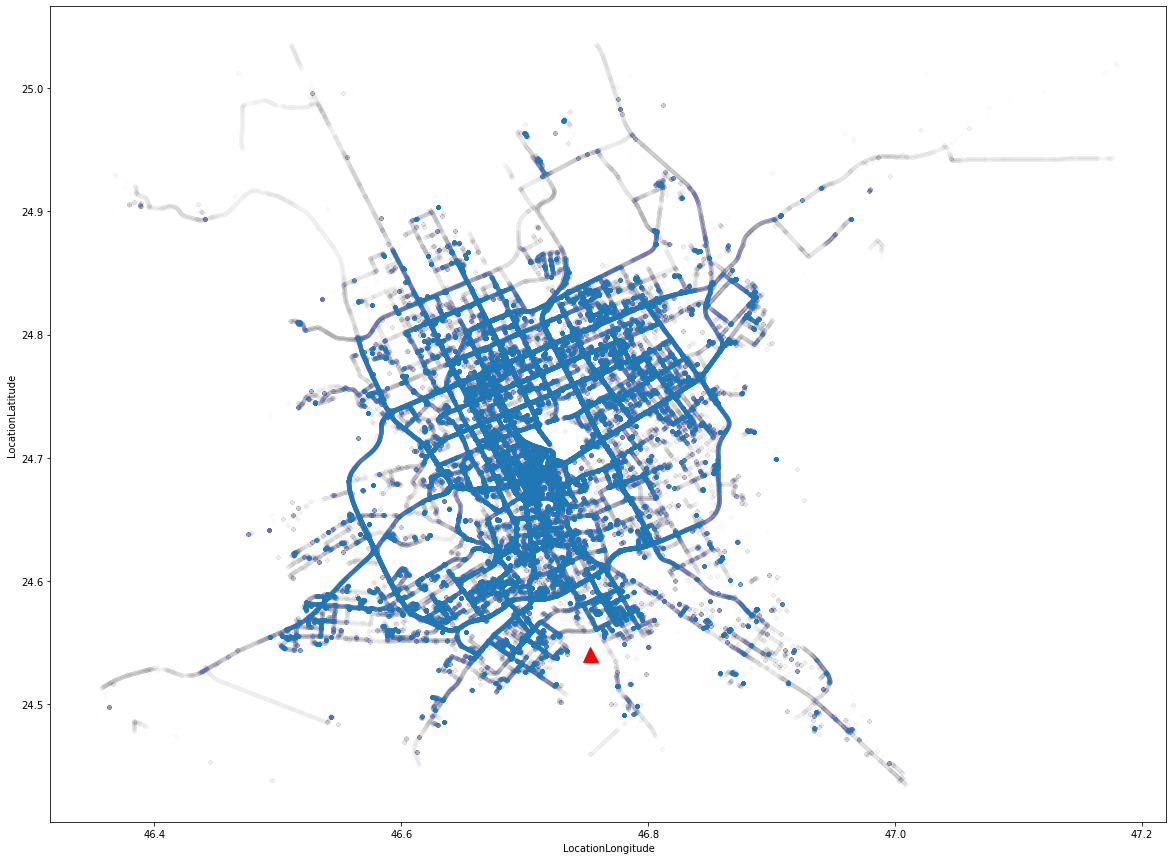

In [ ]:
RSRP_data_valid.plot(kind="scatter", 
                        x="LocationLongitude", 
                        y="LocationLatitude",
                        alpha=0.005,
                        figsize=(20,15))

plt.plot(46.752800, 24.540540, '^r', markersize=15)
plt.show()

***Another map of Riyad.***

We can see that the devices with the invalid RSRP value are distributed as much as the ones with a valid RSRP value, i.e there's no areas which appear on a map but not the other. We can't link these invalid values to a certain area or location, furthur investegation is needed.

In [27]:
RSRP_data_invalid["DeviceManufacturer"].value_counts()

SAMSUNG       598200
Lenovo         12956
HUAWEI         10099
motorola        4743
HTC             3876
LG              3025
OnePlus         2547
HMD Global      2442
Sony            1934
Xiaomi          1199
OPPO             855
vivo             546
QMobile          535
PANASONIC        496
TCL              324
realme           168
E1               135
Hisense           40
OBI                9
Mione              9
Infinix            8
LAVA               6
ZTE                6
SHARP              5
LeEco              0
Name: DeviceManufacturer, dtype: int64

By looking at these numbers and the number for the whole dataset, the issue seems to be happening across all types of devices and not specific to a type. The order of the devices manufacturer is almost the same.

In [28]:
RSRP_data_invalid['RSRP'].value_counts()

 2147483647    643705
 0                455
-1                  2
 12                 1
Name: RSRP, dtype: int64

In [29]:
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 0].sample(20)

Timestamp  LocationLatitude  LocationLongitude  \
300096  2019-11-02 14:31:57.024000+00:00         24.629599          46.716496   
299635  2019-11-02 11:23:17.055000+00:00         24.831778          46.608940   
299888  2019-11-02 11:30:14.051000+00:00         24.830038          46.574657   
2711741 2019-11-03 13:59:17.024000+00:00         24.666490          46.731000   
299818  2019-11-02 11:28:32.049000+00:00         24.834171          46.588566   
157178  2019-11-02 14:32:00.031000+00:00         24.629526          46.716343   
198281  2019-11-02 08:07:58.170000+00:00         24.772840          46.663605   
9857    2019-11-02 11:24:21.043000+00:00         24.829222          46.612140   
141865  2019-11-02 11:27:44.028000+00:00         24.827826          46.591830   
10045   2019-11-02 11:35:36.047000+00:00         24.826984          46.565228   
157137  2019-11-02 11:29:15.004000+00:00         24.834192          46.584488   
142037  2019-11-02 14:30:40.029000+00:00         24.630710          46.718693   
9876    2019-11-02 11:25:41.031000+00:00         24.821869          46.602432   
678053  2019-11-03 08:29:45.062000+00:00         24.766882          46.659588   
141830  2019-11-02 11:26:11.051000+00:00         24.819900          46.597800   
9851    2019-11-02 11:23:57.040000+00:00         24.831875          46.611073   
2711746 2019-11-03 13:59:38.028000+00:00         24.664654          46.732246   
9858    2019-11-02 11:24:26.045000+00:00         24.828380          46.612090   
2711748 2019-11-03 13:59:41.023000+00:00         24.664570          46.732418   
299952  2019-11-02 11:32:09.065000+00:00         24.827530          46.566260   

        RadioConnectionType RadioNetworkGeneration RadioOperatorName  RSRP  \
300096               Mobile                     4G        Operator A     0   
299635               Mobile                     4G        Operator A     0   
299888               Mobile                     4G        Operator A     0   
2711741              Mobile                     4G        Operator A     0   
299818               Mobile                     4G        Operator A     0   
157178               Mobile                     4G        Operator A     0   
198281               Mobile                     3G        Operator A     0   
9857                 Mobile                     4G        Operator A     0   
141865               Mobile                     4G        Operator A     0   
10045                Mobile                     4G        Operator A     0   
157137               Mobile                     4G        Operator A     0   
142037               Mobile                     4G        Operator A     0   
9876                 Mobile                     4G        Operator A     0   
678053               Mobile                     3G        Operator A     0   
141830               Mobile                     4G        Operator A     0   
9851                 Mobile                     4G        Operator A     0   
2711746              Mobile                     4G        Operator A     0   
9858                 Mobile                     4G        Operator A     0   
2711748              Mobile                     4G        Operator A     0   
299952               Mobile                     4G        Operator A     0   

        RadioMobileDataEnabled DeviceManufacturer DeviceName  
300096                 Enabled             HUAWEI       Y6Ii  
299635                 Enabled             HUAWEI       Y6Ii  
299888                 Enabled             HUAWEI       Y6Ii  
2711741                Enabled             HUAWEI       Y6Ii  
299818                 Enabled             HUAWEI       Y6Ii  
157178                 Enabled             HUAWEI       Y6Ii  
198281                 Enabled             HUAWEI     Mate 8  
9857                   Enabled             HUAWEI       Y6Ii  
141865                 Enabled             HUAWEI       Y6Ii  
10045                  Enabled             HUAWEI       Y6Ii

Reporting a 0 for the RSRP value seems to be an issue for HUAWEI Y6li model. By searching online, the large positive value, 2147483647, is the largest number an integer can hold (according to android documentation), and it's reported by android devices when the RSRP value isn't avaliable on the device (due to congestion and other factors). But a 0 value is unexpected.

In [63]:
RSRP_data[RSRP_data["DeviceName"] == "Y6Ii"].shape

(1009, 10)

In [64]:
RSRP_data_invalid[RSRP_data_invalid["DeviceName"] == "Y6Ii"].shape

(429, 10)

In [32]:
RSRP_data_invalid[RSRP_data_invalid["RSRP"] == 0]["DeviceManufacturer"].value_counts()

HUAWEI        455
E1              0
OnePlus         0
SAMSUNG         0
realme          0
motorola        0
ZTE             0
Xiaomi          0
TCL             0
Sony            0
SHARP           0
QMobile         0
PANASONIC       0
OPPO            0
HMD Global      0
OBI             0
Mione           0
Lenovo          0
LeEco           0
LG              0
LAVA            0
Infinix         0
Hisense         0
HTC             0
vivo            0
Name: DeviceManufacturer, dtype: int64

We can see that this an issue only happening with HUAWEI devices and especially the model Y6li. Out of the 1009 devices, 429 devices reported a value of 0 for the RSRP.

In [33]:
RSRP_data_invalid["DeviceName"].value_counts()

Galaxy A7 (2018)    103799
Galaxy J6            69785
Galaxy On7 Prime     47702
Galaxy Note4         45088
Galaxy S7 Edge       31853
                     ...  
Lg Stylus2               0
Lg Stylus 2              0
Lg G6                    0
Redmi Note 5A            0
0Pk72                    0
Name: DeviceName, Length: 292, dtype: int64

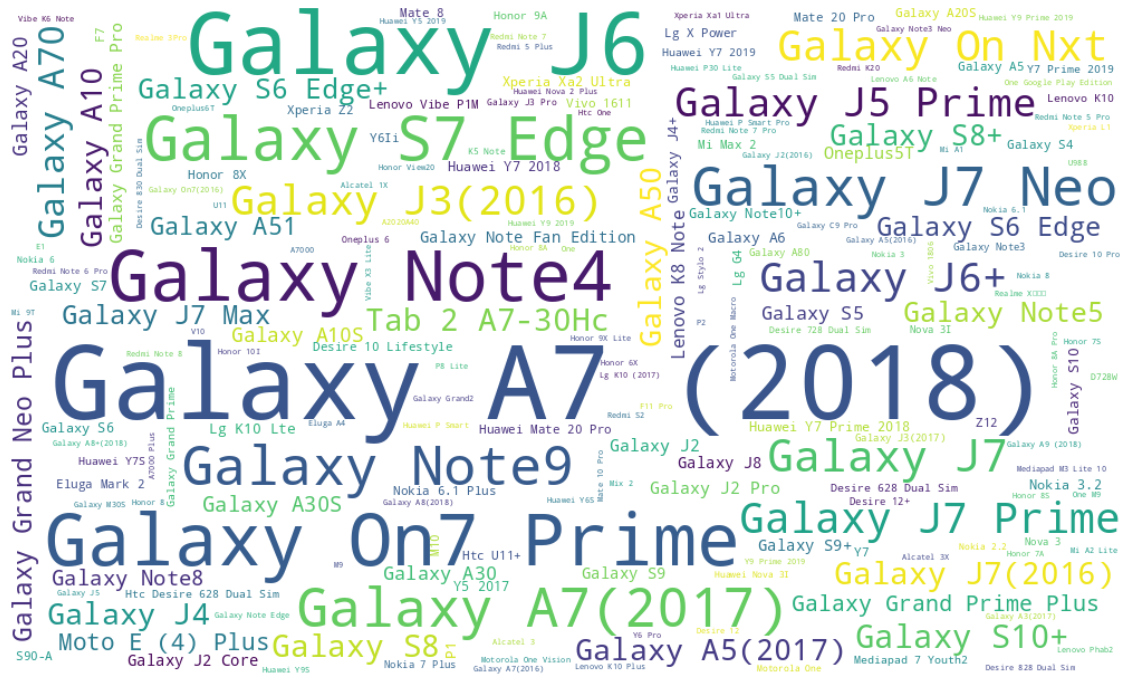

In [34]:
# Another way of plotting these values by creating a wordcloud
manufacturer_word_cloud = WordCloud(background_color="white", width=1000, height=600)
img = manufacturer_word_cloud.generate_from_frequencies(RSRP_data_invalid["DeviceName"].value_counts())

plt.figure(figsize=(20,15))
plt.imshow(img, interpolation="bilinear")
plt.axis("off")
plt.show()

This is a wordcloud of the invalid RSRP values devices.
For the most part devices are with same distribution.

# Visualization:
I'll plot this data in a better way without overplotting or undersampling. This can be achieved using the holoviews ecosystem with its libraries like datashader, holoviews.pandas, hvplot and colorcet

In [35]:
# Don't use the 'TimeStamp' as an index because there are duplicates!
RSRP_data = RSRP_data.sort_values(by="Timestamp", ignore_index=True)
# RSRP_data_valid_time_sorted = RSRP_data_valid_time_sorted.set_index("Timestamp")
RSRP_data.head(10)

Timestamp  LocationLatitude  LocationLongitude  \
0 2019-11-01 18:15:32.097000+00:00         24.639421           46.73017   
1 2019-11-01 18:15:32.505000+00:00         24.639421           46.73017   
2 2019-11-01 18:15:50.376000+00:00         24.639421           46.73017   
3 2019-11-01 18:20:11.389000+00:00         24.639421           46.73017   
4 2019-11-01 18:20:12.035000+00:00         24.639421           46.73017   
5 2019-11-01 18:20:13.264000+00:00         24.639421           46.73017   
6 2019-11-01 18:20:16.996000+00:00         24.639421           46.73017   
7 2019-11-01 18:21:45.695000+00:00         24.639421           46.73017   
8 2019-11-01 18:22:37.206000+00:00         24.639421           46.73017   
9 2019-11-01 18:36:43.521000+00:00         24.626589           46.68925   

  RadioConnectionType RadioNetworkGeneration RadioOperatorName        RSRP  \
0              Mobile                     4G        Operator B        -110   
1              Mobile                     4G        Operator B        -106   
2              Mobile                     4G        Operator B         -93   
3              Mobile                     4G        Operator B        -107   
4              Mobile                     4G        Operator B        -111   
5              Mobile                     4G        Operator B        -106   
6              Mobile                     3G        Operator B  2147483647   
7              Mobile                     3G        Operator B  2147483647   
8              Mobile                     4G        Operator B         -98   
9              Mobile                     4G        Operator C         -95   

  RadioMobileDataEnabled DeviceManufacturer               DeviceName  
0                Enabled            SAMSUNG           Galaxy S7 Edge  
1                Enabled            SAMSUNG           Galaxy S7 Edge  
2                Enabled            SAMSUNG           Galaxy S7 Edge  
3                Enabled            SAMSUNG           Galaxy S7 Edge  
4                Enabled            SAMSUNG           Galaxy S7 Edge  
5                Enabled            SAMSUNG           Galaxy S7 Edge  
6                Enabled            SAMSUNG           Galaxy S7 Edge  
7                Enabled            SAMSUNG           Galaxy S7 Edge  
8                Enabled            SAMSUNG           Galaxy S7 Edge  
9                Enabled            SAMSUNG  Galaxy Grand Prime Plus

In [36]:
df = RSRP_data.copy()

# This step is needed to prepare the data to be plotted on the map
df["LocationLongitude"], df["LocationLatitude"] = lnglat_to_meters(df["LocationLongitude"], df["LocationLatitude"])

In [37]:
# Using the map tiles provided by Esri. OpenStreetMaps can be used as well
# map_tiles = EsriImagery().opts( alpha=0.3, width=1000, height=700, bgcolor='black')

# users_points = hv.Points(RSRP_data_houred, ['LocationLongitude', 'LocationLatitude'])
# # downsampling using datashader
# shaded = hv.operation.datashader.datashade(users_points, cmap=cc.fire, width=1000, height=700)

# # plotting the points over a map provided by the tiles elements 
# map_tiles * shaded

# plot = RSRP_data_houred.hvplot.scatter("LocationLongitude",
#                                 "LocationLatitude",
#                                 rasterize=True,
#                                 cmap=cc.fire,
#                                 cnorm='eq_hist',
#                                 colorbar=False,
#                                 xaxis=None,
#                                 yaxis=None,
#                                 )
# map_tiles * plot 

# pointsA =  hv.Points(df[df["RadioOperatorName"] == "Operator A"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterA = hv.operation.datashader.rasterize(pointsA).opts(cmap=cc.kr, cnorm="eq_hist", width=1000)
# highlightA = hv.operation.datashader.inspect(rasterA).opts(marker="o", size=10, fill_alpha=0, color='red', tools=["hover"])4
    
# pointsB =  hv.Points(df[df["RadioOperatorName"] == "Operator B"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterB = hv.operation.datashader.rasterize(pointsB).opts(cmap=cc.kb, cnorm="eq_hist", width=1000)
# highlightB = hv.operation.datashader.inspect(rasterB).opts(marker="o", size=10, fill_alpha=0, color='green', tools=["hover"])

# pointsC =  hv.Points(df[df["RadioOperatorName"] == "Operator C"], kdims=["LocationLongitude", "LocationLatitude"])
# rasterC = hv.operation.datashader.rasterize(pointsC).opts(cmap=cc.kg, cnorm="eq_hist", width=1000)
# highlightC = hv.operation.datashader.inspect(rasterC).opts(marker="o", size=10, fill_alpha=0, color='blue', tools=["hover"])

# esri  * rasterB * highlightB * rasterC * highlightC* rasterA * highlightA

esri = hv.element.tiles.ESRI().redim(x="Longtitude", y="Latitude").opts(alpha=0.2, width=1000, height=700, bgcolor='black')
COLORS = {"Operator A": cc.kr, "Operator B": cc.kg, "Operator C": cc.kb}

def operator_map(operator_name):
    df_operator = df[df["RadioOperatorName"] == operator_name].copy()
    if (len(df_operator) == 0 ):
        return esri
    operator_points =  hv.Points(df_operator, kdims=["LocationLongitude", "LocationLatitude"])
    rastered = rasterize(operator_points).opts(cmap=COLORS[operator_name], cnorm="eq_hist",  width=1000, height=700)
    operator_highlight = inspect(rastered).opts(marker="o", size=10, fill_alpha=0, color='white', tools=["hover"])
    return esri * rastered * operator_highlight
    
operator_select = pn.widgets.RadioButtonGroup(options=list(COLORS.keys()))
interactive = pn.bind(operator_map, operator_select)
first_app = pn.Column(operator_select, interactive)
first_app

Column
    [0] RadioButtonGroup(options=['Operator A', ...], value='Operator A')
    [1] ParamFunction(function)

In this map we can see the how speard every operator users are and which areas are a hotspot, <span style="color:red">*Operator A*</span> is show in <span style="color:red">*red*</span>, <span style="color:green">*Operator B*</span> is show in <span style="color:green">*green*</span>, <span style="color:blue">*Operator C*</span> is show in <span style="color:blue">*blue*</span>.

In [38]:
points =  hv.Points(df, kdims=["LocationLongitude", "LocationLatitude"])
rastered = rasterize(points).opts(cmap=cc.fire, cnorm="eq_hist", width=1000, height=700)
highlight = inspect(rastered).opts(marker="o", size=10, fill_alpha=0, color='white', tools=["hover"])
esri * rastered * highlight 

:DynamicMap   []
   :Overlay
      .Tiles.I  :Tiles   [Longtitude,Latitude]
      .Image.I  :Image   [LocationLongitude,LocationLatitude]   (LocationLongitude_LocationLatitude Count)
      .Points.I :Points   [LocationLongitude,LocationLatitude]   (Timestamp,RadioConnectionType,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName)

This is a plot of the whole dataset we have for all the operators over the whole period we have.

After cleaning the data is better to save it in a new file, so we don't have to go through all of this processing again if we needed to do more processing.
I'll use a better format than CSV called Parquet, it's built-in pandas only requires the installation of fastparquet library.

In [39]:
print(RSRP_data.shape)

(2725353, 10)


In [40]:
RSRP_data.drop_duplicates(inplace=True)

In [41]:
print(RSRP_data.shape)

(2723541, 10)


RSRP_data dataframe is now more ready for ML algorithms. I'll save the processed data for later use. The parquet format is used because it keeps the data types, faster during read/write operations and much smaller the csv files

In [42]:
#RSRP_data.to_parquet("./Data/RSRP_data_processed.parq")